# INN Hotels Project
# Kothai Niveda M 

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

In [2]:
# load data
booking = pd.read_csv('INNHotelsGroup.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
data = booking.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset.

In [286]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [287]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### Understand the shape of the dataset.

In [288]:
data.shape

(36275, 19)

#### Observations:
* The dataset has 36275 rows and 19 columns 

### Check the data types of the columns for the dataset.

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations:
* Dependent variable is the booking_status which is of object type.
* Booking_ID, type_of_meal_plan, room_type_reserved and market_segment_type are of categorical type while other variables are of numerical type.
* There are no missing values in the dataset.

### Summary of the dataset.

In [290]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


#### Observations:

* `no_of_adults`: Median number of adults per booking is about 2 with maximum value being 4.
* `no_of_children`: 75% of the observations are 0 meaning bookings didnt have any children. Maximum number of children in a booking is 10. 
* `no_of_week_nights`: On average the number of week nights is about 2 days. There is a huge difference in the 75th percentile and maximum value. 
* `lead_time`: On average the lead time is about 85 days. There is a huge difference in the 75th percentile and maximum value.
* `arrival_year`: Majority of bookings were done in 2018.
* `repeated_guest`: 75% of the observations are 0 meaning booking wasn't done by a repeated guest. 
* `no_of_previous_cancellations`: 75% of the observations are 0 meaning bookings were done by customers with no previous cancellations. Maximum number of previous cancellations in a booking is 13, which is quite high.
* `no_of_previous_bookings_not_canceled`: Again, 75% of the observations are 0 meaning bookings were done by customers with no previous bookings not canceled. Maximum number of previous bookings by a customer is 58, which is very high.
* `avg_price_per_room`: On average the average price per room is about 103 Euros. There is a huge difference in the 75th percentile and maximum value.

In [291]:
data.describe(include=["object", "bool"])

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN01152,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


##### Observations:
* Meal Plan 1, Room Type 1 and Online market segment type are the most popular.
* Not Canceled accounts for about two thirds of the data while Canceled forms the other one third of the data. This is a good spread. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate Analysis

In [292]:
# This function will give a boxplot and histogram combined along the same scale for any input numerical variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # We are going to have 2 rows for the subplot grid.
        sharex=True,  # this indicates x-axis will be shared among the subplots.
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # the height ratio of the plots would be 1:3
        figsize=figsize,)
    
    # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # a boxplot will be plotted with 
    # a green triangle representing the mean value.
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2) # a histogram will be plotted with bins if specified in the input, 
    # else it will automatically plot it's own bins.
    
    # Adding mean and median lines for histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Adding mean line.
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")  # Adding median line.

In [293]:
# This function will give a labeled barplot for us to explore categorical variables.


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

### 1. Booking ID

In [294]:
# check unique Booking ID
data['Booking_ID'].value_counts().shape

(36275,)

#### Observations:
* There are 36275 unique Booking IDs. Booking ID is just an identifier for the bookings.

### 2. no_of_adults

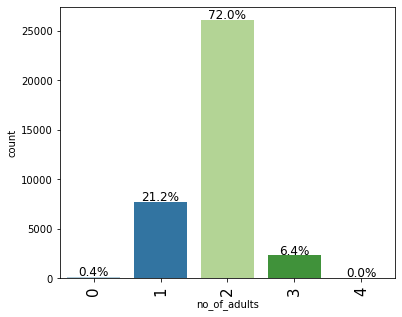

In [295]:
labeled_barplot(data, 'no_of_adults', perc=True)

#### Observations:
* Majority (72%) of bookings have two adults, followed by 21.2% of bookings having 1 adult and 6.4% of bookings having 3 adults. 
* A very small percentage of bookings (0.4%) have no adults and only children. 

### 3. no_of_children

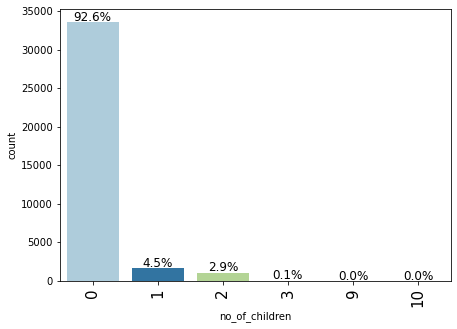

In [296]:
labeled_barplot(data, 'no_of_children', perc=True)

#### Observations:
* Majority (92.6%) of bookings have no children, followed by 4.5% of bookings having 1 child and 2.9% of bookings having 2 children. 

### 4. no_of_weekend_nights

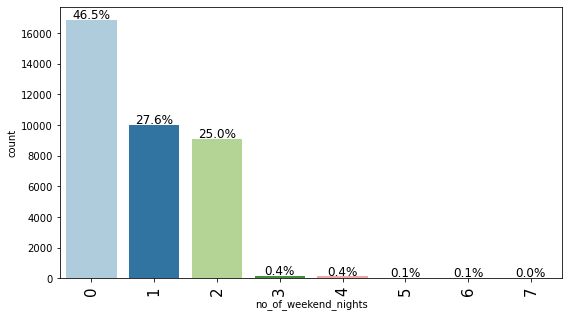

In [297]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

#### Observations:
* Majority (46.5%) of bookings have no weekend nights booked, followed by 27.6% of bookings having 1 weekend night and 25% of bookings having 2 weekend nights booked. 

### 5. no_of_week_nights

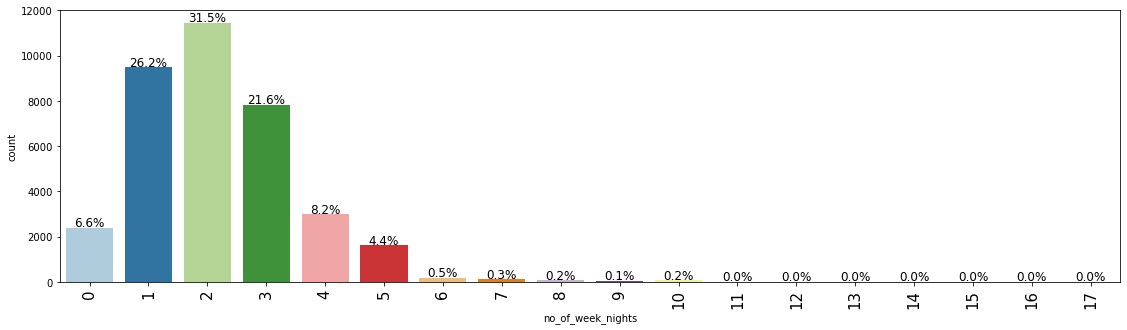

In [298]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

#### Observations:
* Majority (31.5%) of bookings have two weekday nights booked, followed by 26.2% of bookings having 1 weekday night and 21.6% of bookings having 3 weekday nights booked.
* There is a wide range in the number of weekday nights booked - 0 to 17 nights.

### 6. type_of_meal_plan

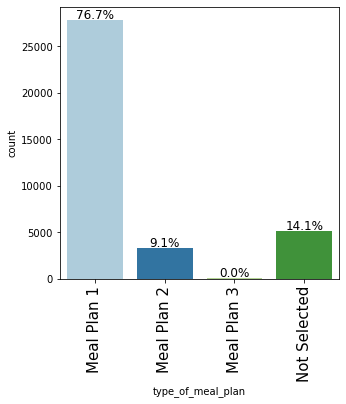

In [299]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

#### Observations:
* Majority (76.7%) of bookings have Meal Plan 1 selected, followed by 14.1% of bookings having no Meal Plan selected and 9.1% of bookings having Meal Plan 2 selected.

### 7. required_car_parking_space

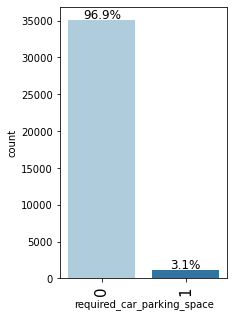

In [300]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

#### Observations:
* Majority (96.9%) of bookings require no parking space and 3.1% of bookings require one car parking space.

### 8. room_type_reserved

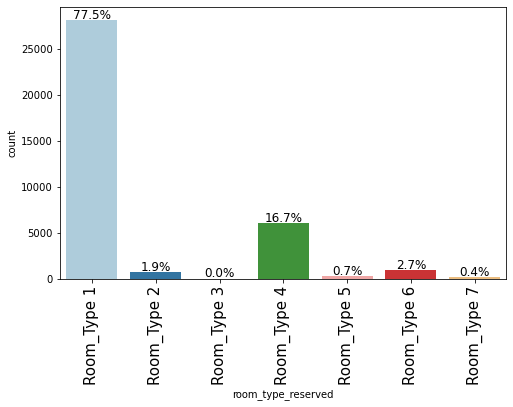

In [301]:
labeled_barplot(data, 'room_type_reserved', perc=True)

#### Observations:
* Majority (77.5%) of bookings have Room_Type 1 selected, followed by 16.7% of bookings having Room_Type 4 selected and 2.7% of bookings have Room_Type 6 selected.

### 9. lead_time

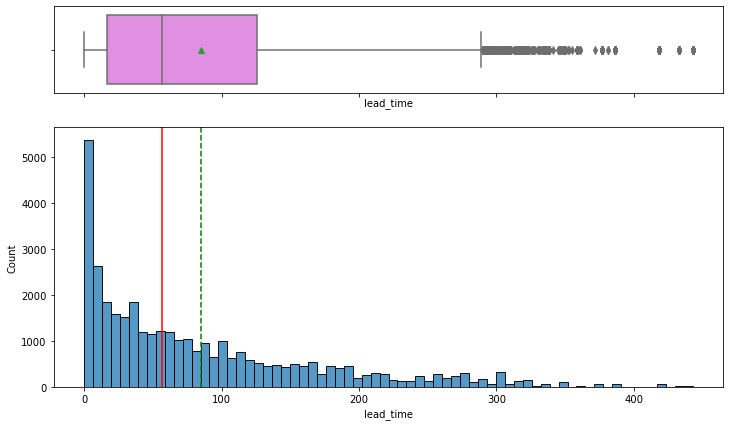

In [302]:
histogram_boxplot(data, 'lead_time')

#### Observations:
* Majority of bookings have 0 days lead time.
* The average lead time is about 85 days with the maximum at about 445 days. 
* The distribution is right skewed.

### 10. arrival_year

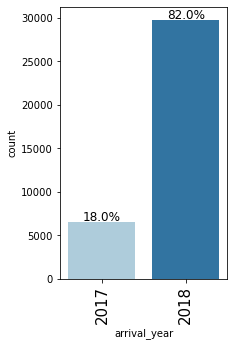

In [303]:
labeled_barplot(data, 'arrival_year', perc=True)

#### Observations:
* Majority (82%) of bookings were done in 2018 and 18% of bookings were done in 2017.

### 11. arrival_month

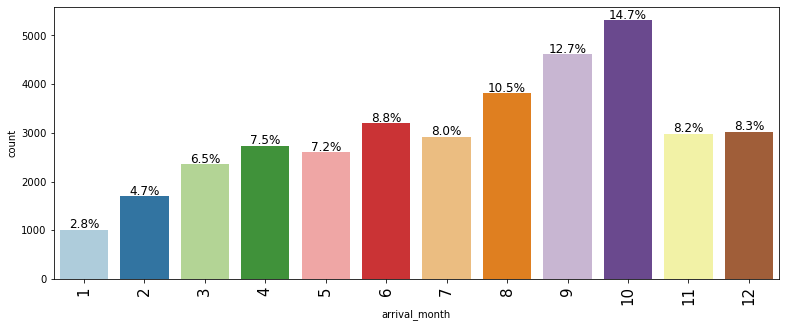

In [304]:
labeled_barplot(data, 'arrival_month', perc=True)

#### Observations:
* Majority (14.7%) of bookings were done in October, followed by 12.7% of bookings in September and 10.5% of bookings in August.
* Number of bookings is higher during the second half of the year. 

#### Q1. What are the busiest months in the hotel?
* The top three busiest months are October (14.7%), Spetember (12.7%) and August (10.5%) respectively.

### 12. arrival_date

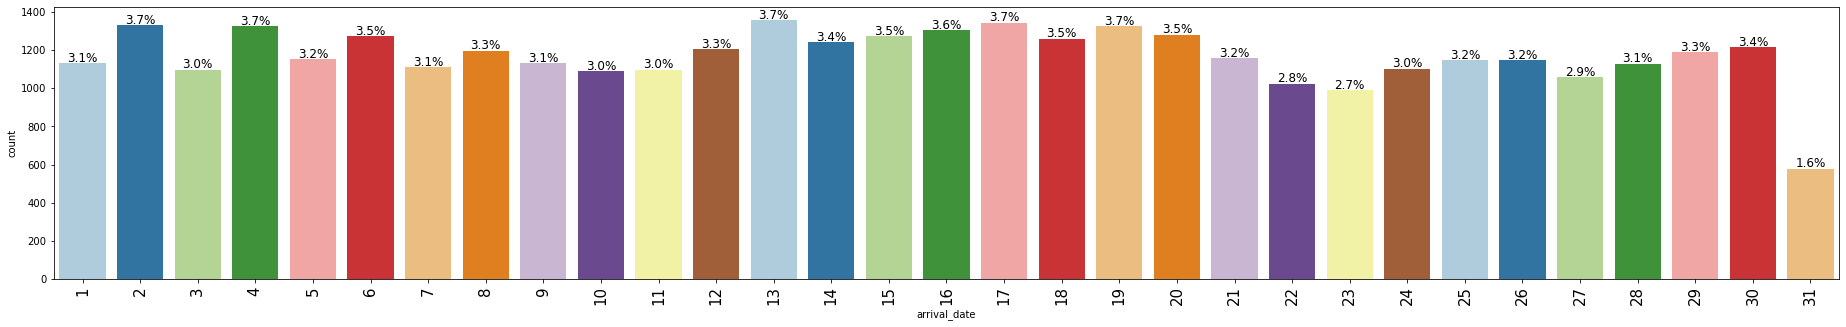

In [305]:
labeled_barplot(data, 'arrival_date', perc=True)

#### Observations:
* Majority (3.7%) of bookings were done on the second, fourth, thirteenth, seventeenth and nineteenth. 
* Almost all dates are similar in terms of number of bookings except for the thirty first which is lower at 1.6% as only 7 months have 31. 

### 13. market_segment_type

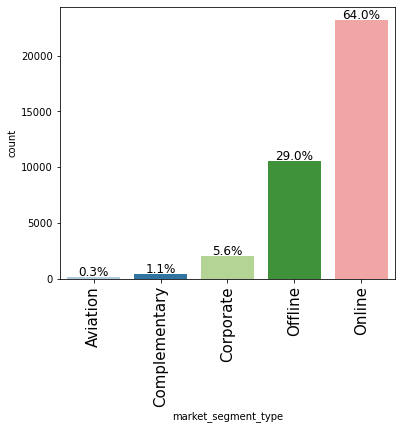

In [306]:
labeled_barplot(data, 'market_segment_type', perc=True)

#### Observations:
* Majority (64%) of bookings are of online market segment type, followed by 29% of bookings being offline and 5.6% of bookings being corporate.

#### Q2. Which market segment do most of the guests come from?
* Most of the guests come from online market segment (64%).

### 14. repeated_guest

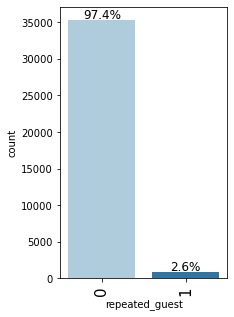

In [307]:
labeled_barplot(data, 'repeated_guest', perc=True)

#### Observations:
* Majority (97.4%) of bookings are by new guests and only 2.6% of bookings are done by repeated customers.

### 15. no_of_previous_cancellations

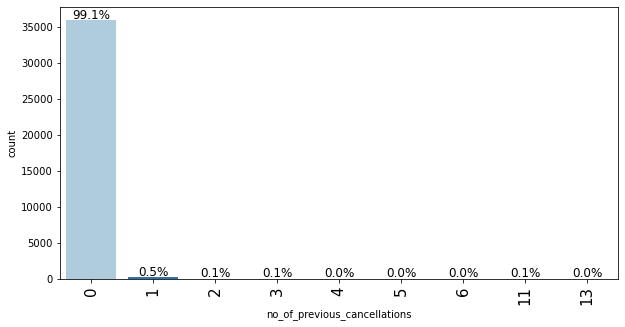

In [308]:
labeled_barplot(data, 'no_of_previous_cancellations', perc=True)

#### Observations:
* In Majority (99.1%) of bookings, the customers had no previous booking cancellations.
* 0.5% of bookings were made by customers who made one previous cancellation.
* There are some customers who made as high as 11 and 13 prior cancellations who we should take note of to avoid in the future. 

### 16. no_of_previous_bookings_not_canceled

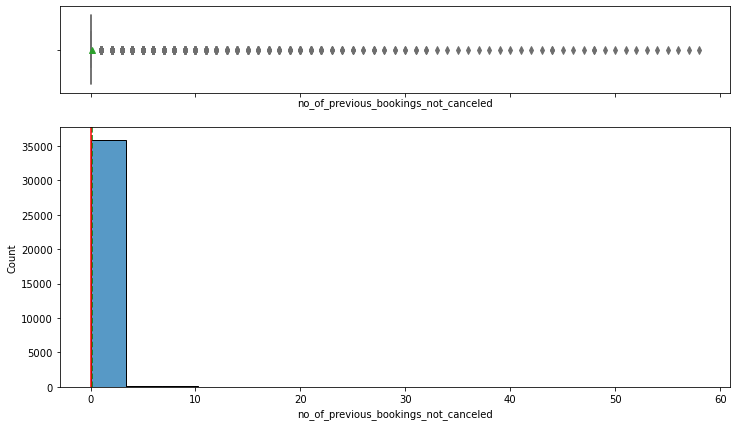

In [309]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

#### Observations:
* In majority of bookings, the customers had no previous bookings not canceled. This might be because majority (97.4%) of bookings are by new guests and only 2.6% of bookings are done by repeated cutomers.
* There is a wide range (0 to 58) of number of previous bookings not cancelled.
* The maximum is 58, which means that the customer has booked 58 times previously and hasn't cancelled a single time before. Customers who have high number of previous bookings not cancelled should be taken note as they are important for brand equity.

### 17. avg_price_per_room

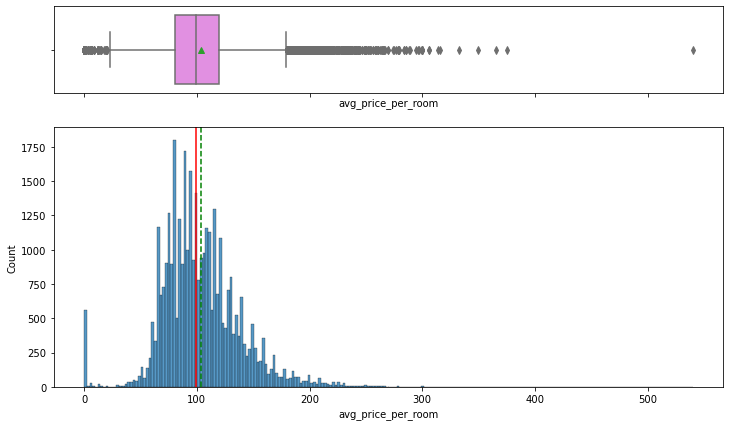

In [310]:
histogram_boxplot(data, 'avg_price_per_room')

#### Observations:
* The distribution is right skewed.
* The average price per room ranges from 0 Euros to a maximum of 540 Euros. 
* The average and median are around 100 Euros. 

### 18. no_of_special_requests

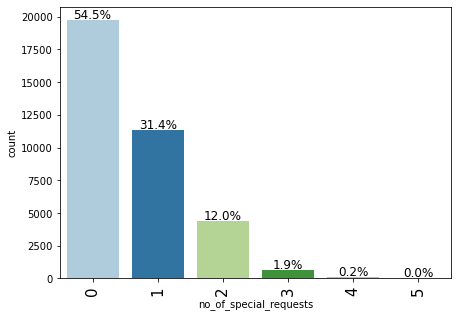

In [311]:
labeled_barplot(data, 'no_of_special_requests', perc=True)

#### Observations:
* Majority (54.5%) of bookings do not have any special requests followed by 31.4% of bookings having one special request and 12% of bookings have two special requests.

### 19. booking_status

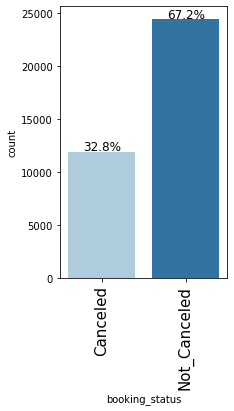

In [312]:
labeled_barplot(data, 'booking_status', perc=True)

#### Observations:
* Majority (67.2%) of bookings are not cancelled and 32.8% of bookings are cancelled. 

#### Q4. What percentage of bookings are canceled?
* 32.8% of bookings are cancelled.

## Bivariate Analysis

### 1. avg_price_per_room vs market_segment_type

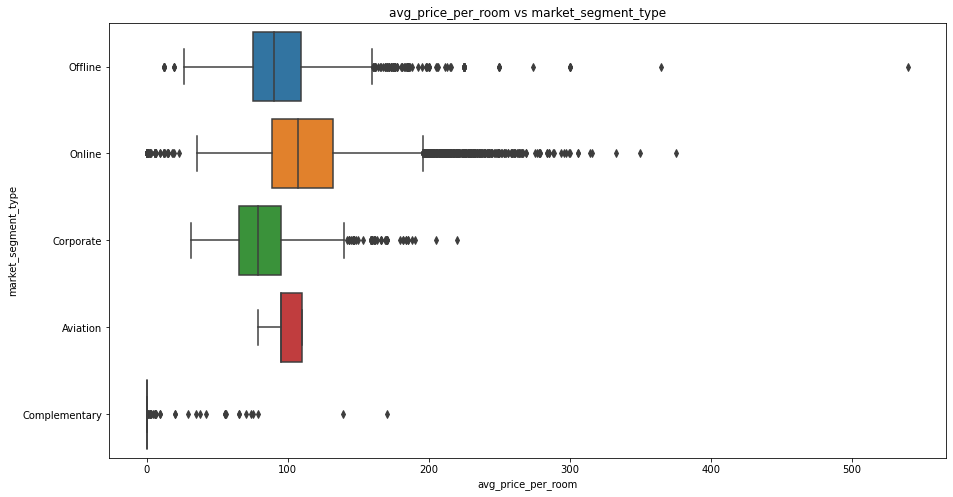

In [313]:
# boxplot of avg_price_per_room vs market_segment_type
plt.figure(figsize=(15,8))
sns.boxplot(data['avg_price_per_room'], data['market_segment_type']);
plt.title('avg_price_per_room vs market_segment_type')
plt.show()

#### Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
* The offline market segment has the widest range, ranging from as low as about 15 Euros to 540 Euros. 
* The online market segment has the highest 75th percentile at about 130 Euros.
* The aviation market segment has a very small range of about 80 Euros to 110 Euros. 
* When compared with offline, online and aviation, corporate has smaller 25th, 50th and 75th percentiles.
* The complementary market segment has minimum average price of 0 Euros. This might be because as the name suggests, those bookings might have been free of charge. The average prices are mostly on the lower end as well as complementary bookings might have been at lower prices.

### 2. repeated_guest vs booking_status

booking_status  Canceled  Not_Canceled
repeated_guest                        
0                  11869         23476
1                     16           914


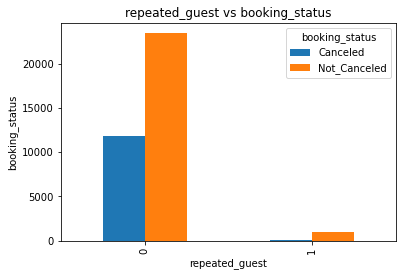

In [314]:
# Cross tabulation between repeated_guest and booking_status
crosstab=pd.crosstab(index=data['repeated_guest'],columns=data['booking_status'])
print(crosstab)
 
# Grouped bar chart between repeated_guest and booking_status
crosstab.plot.bar()
plt.title('repeated_guest vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Observations:
* The cancellation rate of repeated guests are lower at about 2% as compared to new guests who have a higher cancellation rate of about 34%. This might be because repeated guests have visited the hotel before and are coming back again probably because they enjoyed their stay and hence their probability of cancelling would be lower as compared to a new guest.

#### Q5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
* 16/914*100= ~1.75% of repeating guests cancel.

### 3. no_of_special_requests vs booking_status

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
0                           8545         11232
1                           2703          8670
2                            637          3727
3                              0           675
4                              0            78
5                              0             8


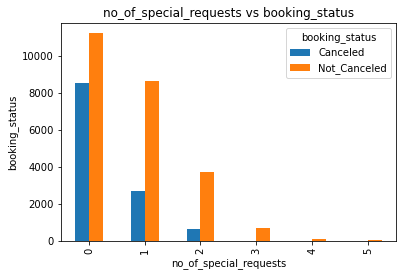

In [315]:
# Cross tabulation between no_of_special_requests and booking_status
crosstab=pd.crosstab(index=data['no_of_special_requests'],columns=data['booking_status'])
print(crosstab)
 
# Grouped bar chart between no_of_special_requests and booking_status
crosstab.plot.bar()
plt.title('no_of_special_requests vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
* As the number of special requests increases, the likelihood of cancellation decreases. 
* Bookings with 3 or more special requests have no cancellations. 
* Cancellations are highest for bookings with no special requests followed by one special request and two special requests.

### 4. type_of_meal_plan vs booking_status

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Meal Plan 2            1506          1799
Meal Plan 3               1             4
Not Selected           1699          3431


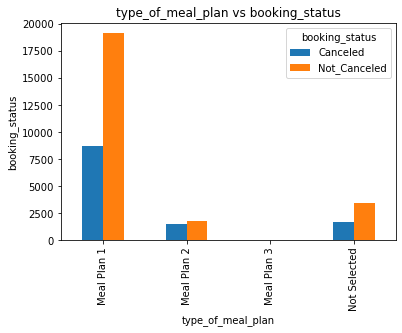

In [316]:
# Cross tabulation between type_of_meal_plan and booking_status
crosstab=pd.crosstab(index=data['type_of_meal_plan'],columns=data['booking_status'])
print(crosstab)
 
# Grouped bar chart between type_of_meal_plan and booking_status
crosstab.plot.bar()
plt.title('type_of_meal_plan vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Observations:
* Bookings with Meal Plan 2 selected have a high cancellation rate of about 46%. Almost half of the bookings with Meal Plan 2 get cancelled. 

### 5. room_type_reserved vs booking_status

booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1             9072         19058
Room_Type 2              228           464
Room_Type 3                2             5
Room_Type 4             2069          3988
Room_Type 5               72           193
Room_Type 6              406           560
Room_Type 7               36           122


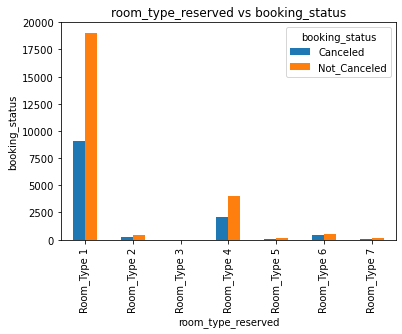

In [317]:
# Cross tabulation between room_type_reserved and booking_status
crosstab=pd.crosstab(index=data['room_type_reserved'],columns=data['booking_status'])
print(crosstab)
 
# Grouped bar chart between room_type_reserved and booking_status
crosstab.plot.bar()
plt.title('room_type_reserved vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Observations:
* Room Type 6 has the highest rate of cancellation at ~42%. Almost half the bookings with Room Type 6 selected get cancelled.
* Room Type 7 has the lowest rate of cancellation at ~23%, but this is not very low.

### 6. lead_time vs booking_status

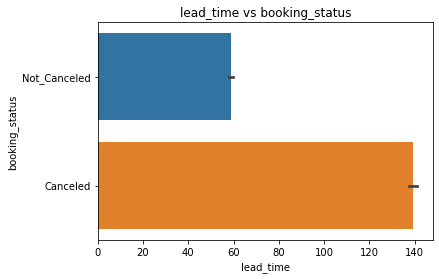

In [318]:
# barplot between lead_time and booking_status
sns.barplot(data['lead_time'], data['booking_status'])
plt.title('lead_time vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Observations:
* There is a higher chance of a booking being cancelled if the lead time is longer.

### 7. arrival month vs booking_status

booking_status  Canceled  Not_Canceled
arrival_month                         
1                     24           990
2                    430          1274
3                    700          1658
4                    995          1741
5                    948          1650
6                   1291          1912
7                   1314          1606
8                   1488          2325
9                   1538          3073
10                  1880          3437
11                   875          2105
12                   402          2619


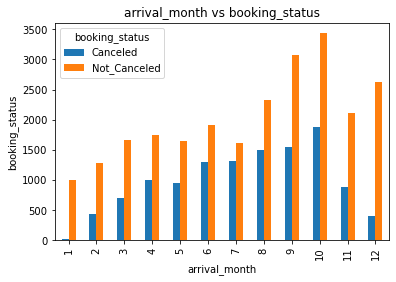

In [319]:
# Cross tabulation between arrival_month and booking_status
crosstab=pd.crosstab(index=data['arrival_month'],columns=data['booking_status'])
print(crosstab)
 
# Grouped bar chart between arrival_month and booking_status
crosstab.plot.bar()
plt.title('arrival_month vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Observations:
* The cancellation rate is the lowest in January (~2%) followed by December (~13%). 
* The cancellation rates for the other months are all higher ranging from ~25% in February to as high as ~45% in July.
* Almost half the bookings in July get cancelled. 
* The top 3 months in terms of cancellations are July (~45%), June (~40%) and August (~39%) respectively which we would have to watch out for. 

### 8. market_segment_type vs booking_status

booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation                   37            88
Complementary               0           391
Corporate                 220          1797
Offline                  3153          7375
Online                   8475         14739


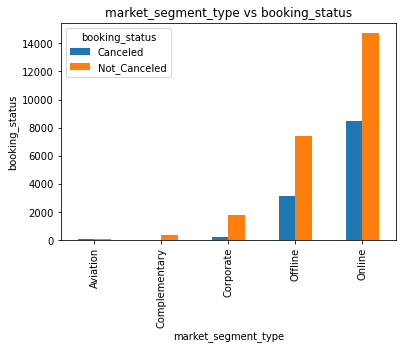

In [320]:
# Cross tabulation between market_segment_type and booking_status
crosstab=pd.crosstab(index=data['market_segment_type'],columns=data['booking_status'])
print(crosstab)
 
# Grouped bar chart between market_segment_type and booking_status
crosstab.plot.bar()
plt.title('market_segment_type vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Observations:
* Complementary market segment type has no cancellations.
* Online market segment type has the highest cancellation rate of about 37%, followed by offline and aviation at about 30% and corporate has the lowest cancellation rate of about 11%.

### 9. no_of_previous_cancellations vs booking_status

booking_status                Canceled  Not_Canceled
no_of_previous_cancellations                        
0                                11869         24068
1                                   11           187
2                                    0            46
3                                    1            42
4                                    0            10
5                                    0            11
6                                    0             1
11                                   0            25
13                                   4             0


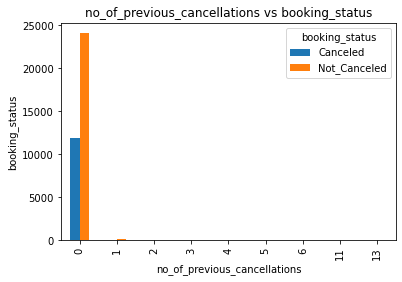

In [321]:
# Cross tabulation between no_of_previous_cancellations and booking_status
crosstab=pd.crosstab(index=data['no_of_previous_cancellations'],columns=data['booking_status'])
print(crosstab)
 
# Grouped bar chart between no_of_previous_cancellations and booking_status
crosstab.plot.bar()
plt.title('no_of_previous_cancellations vs booking_status')
plt.ylabel ('booking_status')
plt.show ()

#### Observations:
* Customers who have previously cancelled 13 times cancelled their current bookings as well. This group must be closely monitored and any future bookings by them should be declined as they have a high chance of cancelling it once again.

### Heatmap

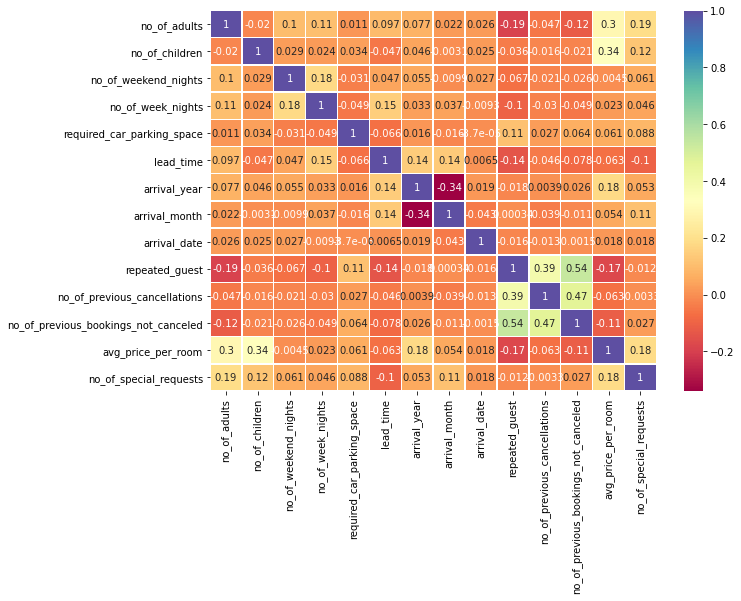

In [322]:
# plotting a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(), cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

#### Observations:
* repeated_guest and no_of_previous_bookings_not_canceled have a positive correlation (0.54). This is expected as repeated guest would have booked previously. 
* Other variables dont have much correlation.

### Observations from EDA:

* `Booking_ID` : There are 36275 unique Booking IDs. Booking ID is just an identifier for the bookings.
* `no_of_adults` : Majority (72%) of bookings have two adults, followed by 21.2% of bookings having 1 adult and 6.4% of bookings having 3 adults. A very small percentage of bookings (0.4%) have no adults and only children.
* ` no_of_children` : Majority (92.6%) of bookings have no children, followed by 4.5% of bookings having 1 child and 2.9% of bookings having 2 children.
* `no_of_weekend_nights` : Majority (46.5%) of bookings have no weekend nights booked, followed by 27.6% of bookings having 1 weekend night and 25% of bookings having 2 weekend nights booked.
* `no_of_week_nights` : Majority (31.5%) of bookings have two weekday nights booked, followed by 26.2% of bookings having 1 weekday night and 21.6% of bookings having 3 weekday nights booked. There is a wide range in the number of weekday nights booked - 0 to 17 nights.
* `type_of_meal_plan` : Majority (76.7%) of bookings have Meal Plan 1 selected, followed by 14.1% of bookings having no Meal Plan selected and 9.1% of bookings having Meal Plan 2 selected. Bookings with Meal Plan 2 selected have a high cancellation rate of about 46%. Almost half of the bookings with Meal Plan 2 get cancelled.
* `required_car_parking_space` : Majority (96.9%) of bookings require no parking space and 3.1% of bookings require one car parking space.
* `room_type_reserved` : Majority (77.5%) of bookings have Room_Type 1 selected, followed by 16.7% of bookings having Room_Type 4 selected and 2.7% of bookings have Room_Type 6 selected. Room Type 6 has the highest rate of cancellation at ~42%. Almost half the bookings with Room Type 6 selected get cancelled. Room Type 7 has the lowest rate of cancellation at ~23%, but this is not very low.
* `lead_time` : Majority of bookings have 0 days lead time. The average lead time is about 85 days with the maximum at about 445 days. There is a higher chance of a booking being cancelled if the lead time is longer.
* `arrival_year` : Majority (82%) of bookings were done in 2018 and 18% of bookings were done in 2017.
* `arrival_month` : Majority (14.7%) of bookings were done in October, followed by 12.7% of bookings in September and 10.5% of bookings in August. Number of bookings is higher during the second half of the year. The cancellation rate is the lowest in January (~2%) followed by December (~13%). The cancellation rates for the other months are all higher ranging from ~25% in February to as high as ~45% in July. Almost half the bookings in July get cancelled. The top 3 months in terms of cancellations are July (~45%), June (~40%) and August (~39%) respectively which we would have to watch out for.
* `arrival_date` : Majority (3.7%) of bookings were done on the second, fourth, thirteenth, seventeenth and nineteenth. Almost all dates are similar in terms of number of bookings except for the thirty first which is lower at 1.6% as only 7 months have 31.
* `market_segment_type` : Majority (64%) of bookings are of online market segment type, followed by 29% of bookings being offline and 5.6% of bookings being corporate. Complementary market segment type has no cancellations. Online market segment type has the highest cancellation rate of about 37%, followed by offline and aviation at about 30% and corporate has the lowest cancellation rate of about 11%.
* `repeated_guest` : Majority (97.4%) of bookings are by new guests and only 2.6% of bookings are done by repeated customers. The cancellation rate of repeated guests are lower at about 2% as compared to new guests who have a higher cancellation rate of about 34%. This might be because repeated guests have visited the hotel before and are coming back again probably because they enjoyed their stay and hence their probability of cancelling would be lower as compared to a new guest.
* `no_of_previous_cancellations` : In Majority (99.1%) of bookings, the customers had no previous booking cancellations. 0.5% of bookings were made by customers who made one previous cancellation. There are some customers who made as high as 11 and 13 prior cancellations who we should take note of to avoid in the future. Customers who have previously cancelled 13 times cancelled their current bookings as well. This group must be closely monitored and any future bookings by them should be declined as they have a high chance of cancelling it once again.
* `no_of_previous_bookings_not_canceled` : In majority of bookings, the customers had no previous bookings not canceled. This might be because majority (97.4%) of bookings are by new guests and only 2.6% of bookings are done by repeated cutomers. There is a wide range (0 to 58) of number of previous bookings not cancelled. The maximum is 58, which means that the customer has booked 58 times previously and hasn't cancelled a single time before. Customers who have high number of previous bookings not cancelled should be taken note as they are important for brand equity.
* `avg_price_per_room` : The average price per room ranges from 0 Euros to a maximum of 540 Euros. The average and median are around 100 Euros.
* `no_of_special_requests` : Majority (54.5%) of bookings do not have any special requests followed by 31.4% of bookings having one special request and 12% of bookings have two special requests. As the number of special requests increases, the likelihood of cancellation decreases. Bookings with 3 or more special requests have no cancellations. Cancellations are highest for bookings with no special requests followed by one special request and two special requests.
* `booking_status` : Majority (67.2%) of bookings are not cancelled and 32.8% of bookings are cancelled.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Missing value check

In [323]:
# checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observations:
* There are no missing values, hence no missing value treatment is necessary.

### Duplicate values check

In [324]:
data.duplicated().sum()

0

#### Observations:
* There are no duplicates in the data.

### Drop Booking_ID

In [7]:
# lets create a copy of the data
d1 = data.copy()
# dropping Booking_ID as it is not necessary
d1.drop(["Booking_ID"], axis=1, inplace=True)

### EDA

- It is a good idea to explore the data once again after manipulating it.

In [326]:
d1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#### Observations:
* Now the Booking_ID column in dropped.

### Data Preparation

In [8]:
# creating dummy varibles
d2 = pd.get_dummies(
    d1,
    columns=[
        "type_of_meal_plan",
        "room_type_reserved",
        "market_segment_type",
    ],
    drop_first=True,
)
d2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,Not_Canceled,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,Not_Canceled,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,Canceled,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,Canceled,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,Canceled,0,0,1,0,0,0,0,0,0,0,0,0,1


In [9]:
# encoding Booking_Status variable: Canceled to 1 and Not_Canceled to 0
d2["booking_status"] = d2["booking_status"].apply(lambda x: 0 if x == "Not_Canceled" else 1)
d2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


### Split Data and creating Train and Test sets

In [10]:
X = d2.drop("booking_status", axis=1)  # Features
y = d2["booking_status"].astype("int64")  # Target Variable
# converting target to integers 


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [330]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


#### Observations:
* So we have about 32% of Canceled bookings and about 67% of Not_Canceled bookings in both our training and test set which is a good distribution of Canceled and Not_Canceled cases in the data.

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting the booking_status as Not_Cancelled but in reality the booking status is Cancelled.
2. Predicting the booking_status as Cancelled but in reality the booking status is Not_Cancelled.

### Which case is more important? 
The first case is more important as 

- losses are particularly high on last-minute cancellations.
- option to cancel is free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. 
- new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior.
- cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall, higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [331]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [332]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

In [333]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X_train_1 = sm.add_constant(X_train)
# adding constant to the test data
X_test_1 = sm.add_constant(X_test)

In [334]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train_1.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3293
Time:                        07:35:17   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

In [335]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train_1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806041,0.634222,0.739749,0.682933


**Observations**

- Negative values of the coefficient shows that probability of the booking_status being cancelled decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of booking_status being cancelled increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [336]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])],
    index=X_train_1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.946816e+07
no_of_adults                            1.348154e+00
no_of_children                          1.978229e+00
no_of_weekend_nights                    1.069475e+00
no_of_week_nights                       1.095667e+00
required_car_parking_space              1.039928e+00
lead_time                               1.394914e+00
arrival_year                            1.430830e+00
arrival_month                           1.275673e+00
arrival_date                            1.006738e+00
repeated_guest                          1.783516e+00
no_of_previous_cancellations            1.395689e+00
no_of_previous_bookings_not_canceled    1.651986e+00
avg_price_per_room                      2.050421e+00
no_of_special_requests                  1.247278e+00
type_of_meal_plan_Meal Plan 2           1.271851e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.272183e+00
room_type_r

#### Observations:
* market_segment_type_corporate, market_segment_type_offline and market_segment_type_online exhibit high multicollinearity, having VIF scores greater than 10.
* However, since the VIF values for dummy variables can be ignored, we can assume that the above predictors have no multicollinearity and the assumption is satisfied.

### p-values

As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

Many predictor variables have p-value > 0.05. So, they are not significant and we'll drop them.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.

In [337]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train_1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train_1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [338]:
X_train_2 = X_train_1[selected_features]

In [339]:
logit1 = sm.Logit(y_train, X_train_2.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3283
Time:                        07:35:31   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train_2* as the final ones and *lg1* as final model.**

### Coefficient interpretations

* Coefficient of no_of_adults,no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Meal Plan 2 and type_of_meal_plan_Not Selected are positive. An increase in these will lead to increase in chances of the booking status being Canceled.  

* Coefficient of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room types reserved 2, 4, 5, 6, 7 and market segment types Corporate and Offline are negative. An increase in these will lead to decrease in the booking status being Canceled.

### Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [340]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train_2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.114754,1.164360,1.114753,1.042636,0.203048,1.015835,1.573235,0.958528,0.064797,1.257157,1.019348,0.229941,1.179916,1.330892,0.700461,0.753830,0.479403,0.380991,0.239033,0.452584,0.167504
Change_odd%,-100.0,11.475363,16.436009,11.475256,4.263629,-79.695231,1.583521,57.323511,-4.147245,-93.520258,25.715665,1.934790,-77.005947,17.991562,33.089244,-29.953888,-24.617006,-52.059666,-61.900934,-76.096691,-54.741616,-83.249628


### Coefficient interpretations

* `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults will increase the odds of a booking being canceled by ~1.1 times or a ~11.48% increase in odds of having a booking canceled.

* `no_of_week_nights`: Holding all other features constant a 1 unit change in the no_of_week_nights will increase the the odds of a booking being canceled by ~1.04 times or a ~4.26% increase in odds of having a booking canceled. 

`Interpretation for other attributes can be done similarly.`

## Model performance evaluation

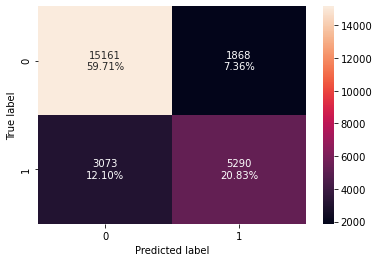

In [341]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train_2, y_train)

In [342]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train_2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805411,0.632548,0.739033,0.681657


### ROC-AUC

* ROC-AUC on training set

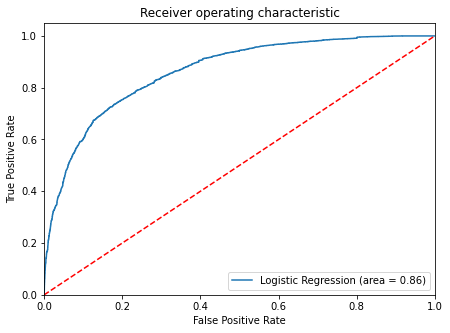

In [343]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train_2))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train_2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [344]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train_2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3710466623489227


#### Checking model performance on training set

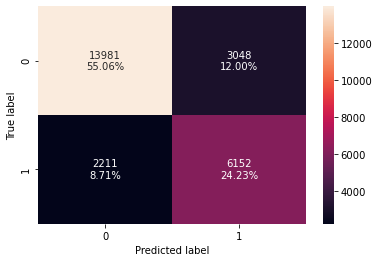

In [345]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train_2, y_train, threshold=optimal_threshold_auc_roc
)

In [346]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train_2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792888,0.735621,0.668696,0.700564


* Recall of model has increased.

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [347]:
X_test_2 = X_test_1[selected_features]

**Using model with default threshold**

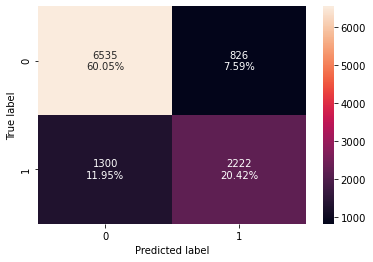

In [348]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test_2, y_test)

In [349]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test_2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804649,0.630892,0.729003,0.676408


* ROC curve on test set

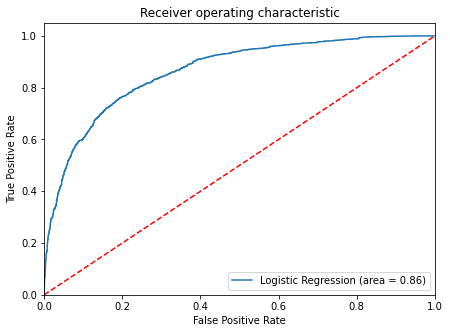

In [350]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test_2))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test_2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

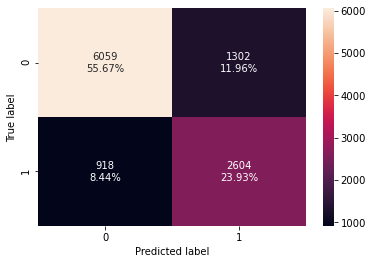

In [351]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test_2, y_test, threshold=optimal_threshold_auc_roc)

In [352]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test_2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.796012,0.739353,0.666667,0.701131


## Final Model Summary and Conclusions

### Training Performance summary

In [353]:
# training performance comparison

models_train_comp_df = pd.concat(
    [log_reg_model_train_perf.T,
    log_reg_model_train_perf_threshold_auc_roc.T,],
    axis=1,)

models_train_comp_df.columns = [
    "Logistic Regression-0.50 Threshold",
    "Logistic Regression-0.37 Threshold",]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-0.50 Threshold,Logistic Regression-0.37 Threshold
Accuracy,0.805411,0.792888
Recall,0.632548,0.735621
Precision,0.739033,0.668696
F1,0.681657,0.700564


### Testing Performance summary

In [354]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-0.50 Threshold",
    "Logistic Regression-0.37 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-0.50 Threshold,Logistic Regression-0.37 Threshold
Accuracy,0.804649,0.796012
Recall,0.630892,0.739353
Precision,0.729003,0.666667
F1,0.676408,0.701131


### Observations and Conclusions:
* We have been able to build a predictive model that can be used by INN Hotel to predict which booking is likely to be canceled with a recall score of about 0.74 and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Both training and test performances are close to each other.

* Coefficient of no_of_adults,no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Meal Plan 2 and type_of_meal_plan_Not Selected are positive. An increase in these will lead to increase in chances of the booking status being Canceled.  

* Coefficient of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room types reserved 2, 4, 5, 6, 7 and market segment types Corporate and Offline are negative. An increase in these will lead to decrease in the booking status being Canceled.



## Decision Tree model

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [355]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [356]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building a Decision Tree Model
* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [357]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training set

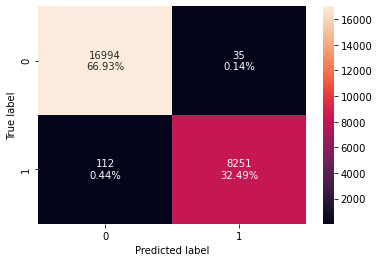

In [358]:
confusion_matrix_sklearn(dTree, X_train, y_train)

In [359]:
decision_tree_perf_train = get_recall_score(dTree, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9866076766710511


#### Observations:
* Model is able to almost perfectly classify all the data points on the training set with a high recall score of about 0.98.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

### Checking model performance on test set

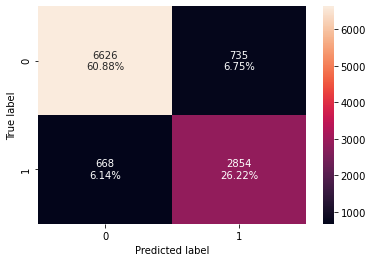

In [360]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [361]:
decision_tree_perf_test = get_recall_score(dTree, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8103350369108461


#### Observations:
* There is a difference of about 0.18 in recall score of training set and test set, which suggests that the model is a bit overfitting.

### Visualizing the Decision Tree

In [362]:
## creating a list of column names
feature_names = X_train.columns.to_list()

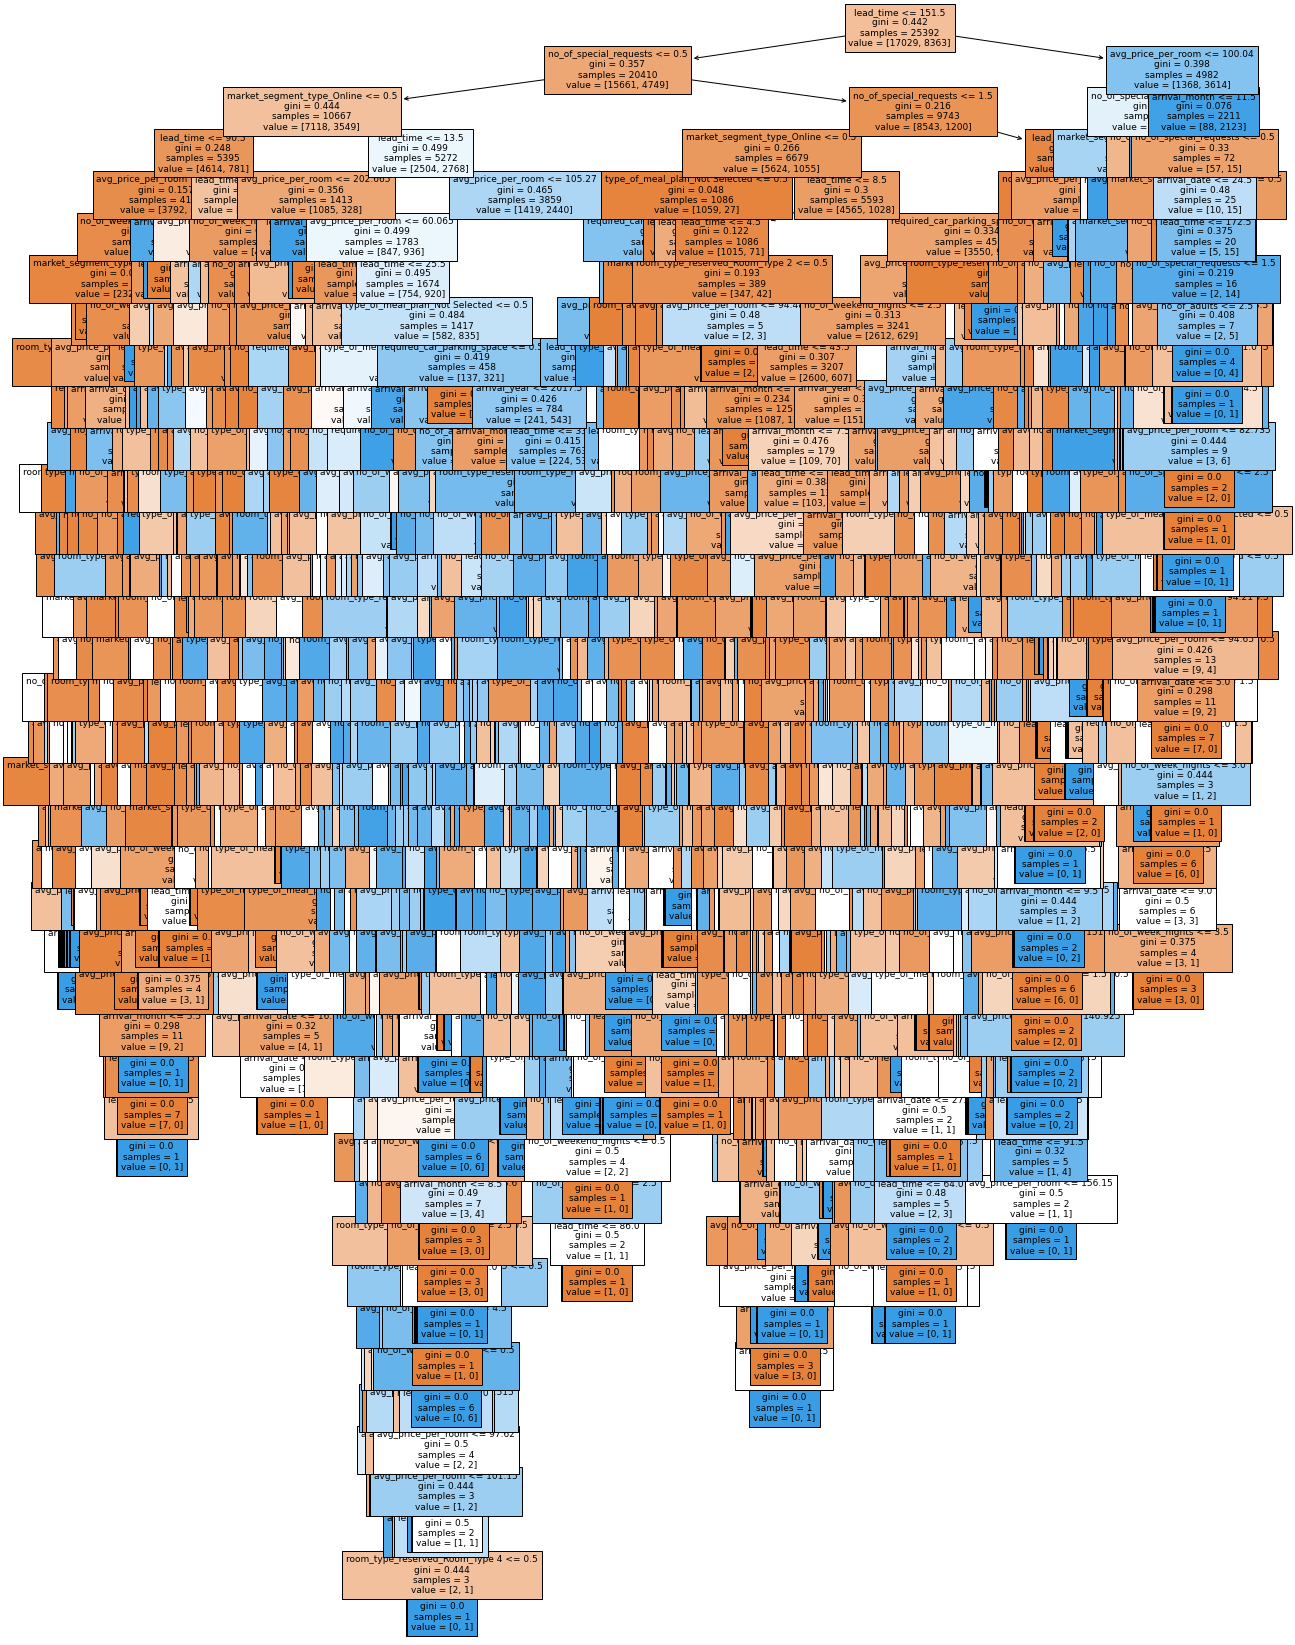

In [363]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [364]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

#### Observations:
* The tree above is very complex and difficult to interpret.

In [365]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.350353
avg_price_per_room                    0.177265
market_segment_type_Online            0.092345
arrival_date                          0.085259
no_of_special_requests                0.067948
arrival_month                         0.064570
no_of_week_nights                     0.045395
no_of_weekend_nights                  0.038528
no_of_adults                          0.027482
arrival_year                          0.011793
type_of_meal_plan_Not Selected        0.008234
room_type_reserved_Room_Type 4        0.006904
required_car_parking_space            0.006878
market_segment_type_Offline           0.003927
type_of_meal_plan_Meal Plan 2         0.003704
no_of_children                        0.003672
room_type_reserved_Room_Type 5        0.001681
room_type_reserved_Room_Type 2        0.001486
market_segment_type_Corporate         0.000646
repeated_guest                        0.000601
room_type_res

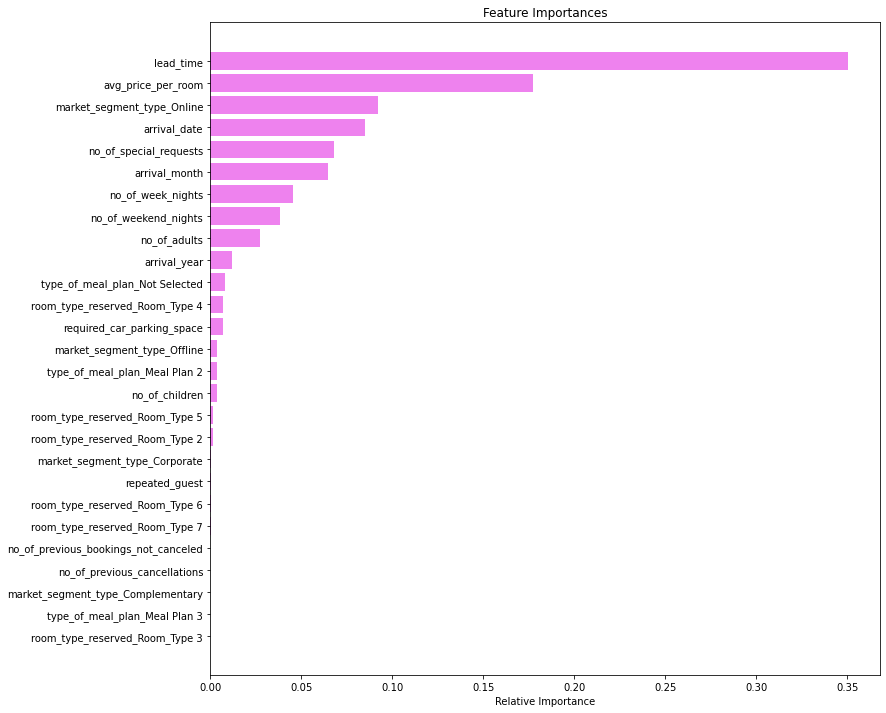

In [366]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* According to the decision tree model, lead_time is the most important variable for predicting if a booking would be canceled or not.

### Using GridSearch for Hyperparameter tuning of our tree model
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [367]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
# Grid of parameters to choose from
parameters = {
    'max_depth': [5, 10, 15, None], 
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'max_leaf_nodes' : [2, 3, 5, 10],
    'criterion': ["entropy", "gini"],
    'min_impurity_decrease': [0.0001,0.001,0.01,0.1],
    'splitter': ["best", "random"],

}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, random_state=1)

### Checking performance on training set

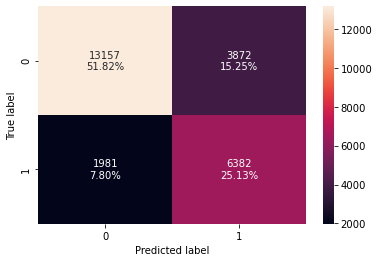

In [368]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [369]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.7631232811192156


### Checking performance on test set

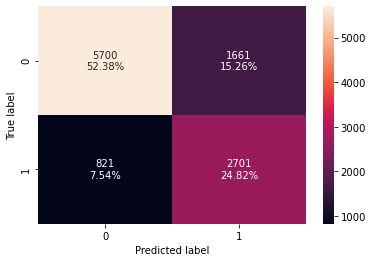

In [370]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [371]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.7668938103350369


#### Observations:
* Recall score of test set has decreased slightly from ~0.81 to ~0.77. Though the recall score has decreased, it is only a slight decrease and there is a better predictability of the model with lesser over-fitting. 

### Visualizing the Decision Tree after Hyperparameter tuning

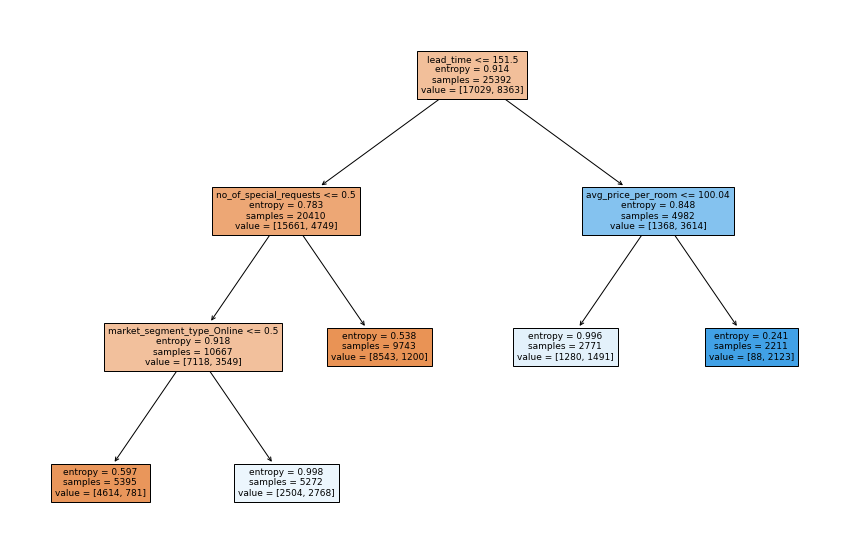

In [372]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [373]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2504.00, 2768.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8543.00, 1200.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1280.00, 1491.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [88.00, 2123.00] class: 1



#### Observations:

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a booking was made with a lead time of less than or equals to 151.50 days and the number of special requests was less than or equals to 0.5, and the market segment type Online was less than or equals to 0.50, the booking would not be canceled. But if the market segment type online was greater than 0.50, it would be cancelled.
* If a booking was made with a lead time of less than or equals to 151.50 days and the number of special requests was more than 0.5, the booking would be canceled.

`Interpretations from other decision rules can be made similarly`

In [374]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.486891
market_segment_type_Online            0.211087
no_of_special_requests                0.151667
avg_price_per_room                    0.150355
no_of_week_nights                     0.000000
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
required_car_parking_space            0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previou

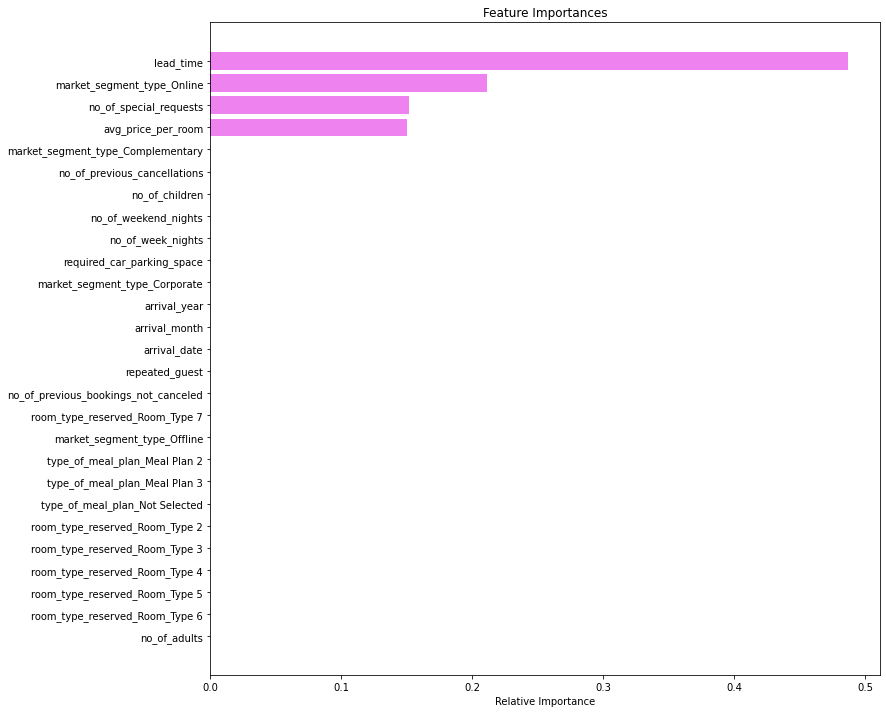

In [375]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree lead_time is the most important feature followed by market_segment_type_Online. Let's see if post pruning helps to further increase recall score on test set.

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [11]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [12]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007572
1,4.327745e-07,0.007573
2,4.688391e-07,0.007573
3,5.329960e-07,0.007574
4,6.133547e-07,0.007575
...,...,...
1340,6.665684e-03,0.286897
1341,1.304480e-02,0.299942
1342,1.725993e-02,0.317202
1343,2.399048e-02,0.365183


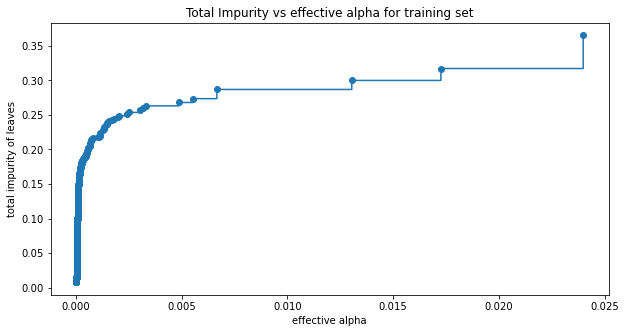

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

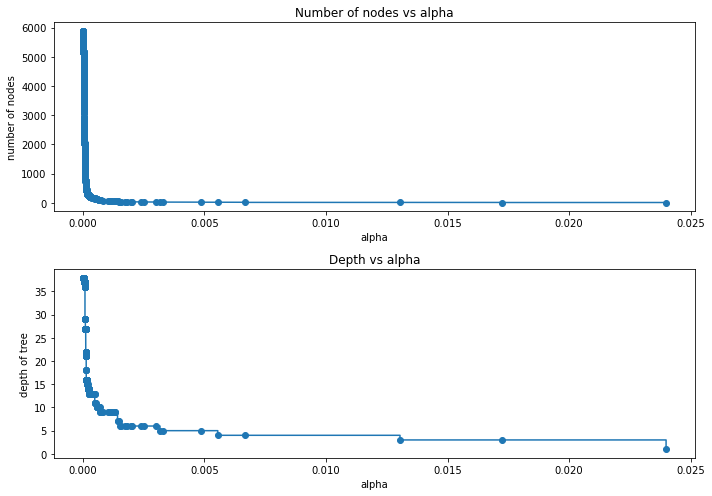

In [15]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [16]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [17]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

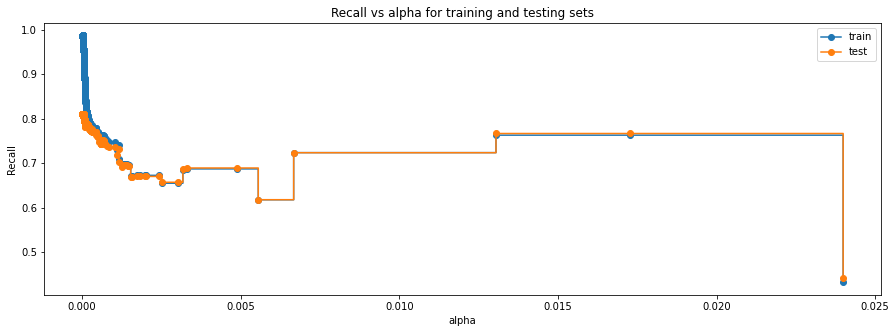

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Observations:
* Maximum value of Recall is at 0 alpha, however this is without any pruing done to the tree. So we would choose the next highest value of Recall which has a corresponding alpha of about 0.00012 so as to reduce overfitting. 

In [20]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model2 = clfs[index_best_model]
print(best_model2)

DecisionTreeClassifier(ccp_alpha=1.3127494223902537e-05, random_state=1)


In [385]:
best_model = DecisionTreeClassifier(
    ccp_alpha=0.00012, random_state=1
)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00012, random_state=1)

### Checking performance on the training set

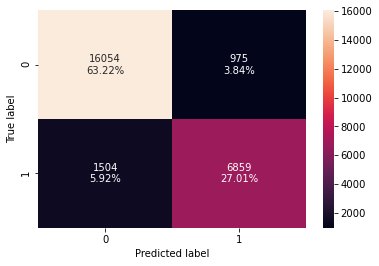

In [386]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [387]:
decision_tree_postpruned_perf_train = get_recall_score(best_model, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.8201602295826856


### Checking performance on the test set

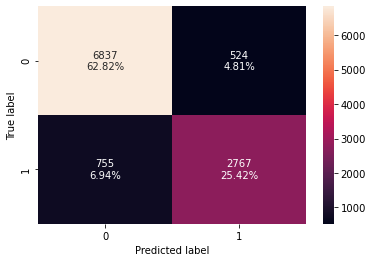

In [388]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [389]:
decision_tree_postpruned_perf_test = get_recall_score(best_model, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.7856331629755821


#### Observations:
* The results have decreased slightly (0.81 to 0.79) from the inital  model. However, even though it has decreased slightly there is a better predictability of the model with lesser over-fitting. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree after post pruning

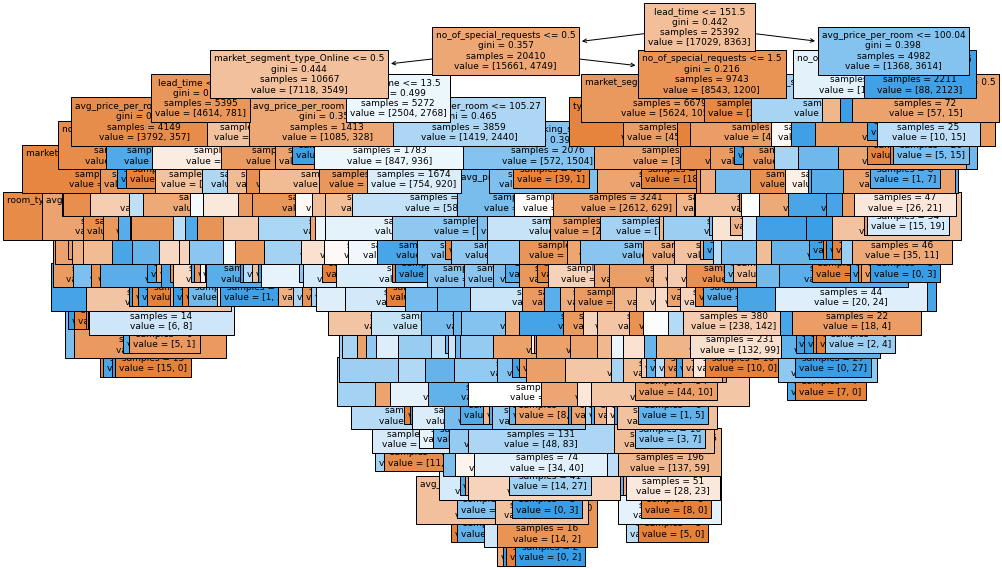

In [390]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [391]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [509.00, 30.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [42.00, 5.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- arrival_d

In [393]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.399590
avg_price_per_room                    0.157862
market_segment_type_Online            0.136050
no_of_special_requests                0.098519
arrival_month                         0.056700
arrival_date                          0.038851
no_of_weekend_nights                  0.031370
no_of_adults                          0.024141
no_of_week_nights                     0.018278
arrival_year                          0.013905
required_car_parking_space            0.009833
market_segment_type_Offline           0.005003
type_of_meal_plan_Not Selected        0.002642
room_type_reserved_Room_Type 4        0.002585
type_of_meal_plan_Meal Plan 2         0.002544
room_type_reserved_Room_Type 5        0.001058
room_type_reserved_Room_Type 2        0.000602
no_of_children                        0.000466
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_gues

In [394]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.399590
avg_price_per_room                    0.157862
market_segment_type_Online            0.136050
no_of_special_requests                0.098519
arrival_month                         0.056700
arrival_date                          0.038851
no_of_weekend_nights                  0.031370
no_of_adults                          0.024141
no_of_week_nights                     0.018278
arrival_year                          0.013905
required_car_parking_space            0.009833
market_segment_type_Offline           0.005003
type_of_meal_plan_Not Selected        0.002642
room_type_reserved_Room_Type 4        0.002585
type_of_meal_plan_Meal Plan 2         0.002544
room_type_reserved_Room_Type 5        0.001058
room_type_reserved_Room_Type 2        0.000602
no_of_children                        0.000466
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_gues

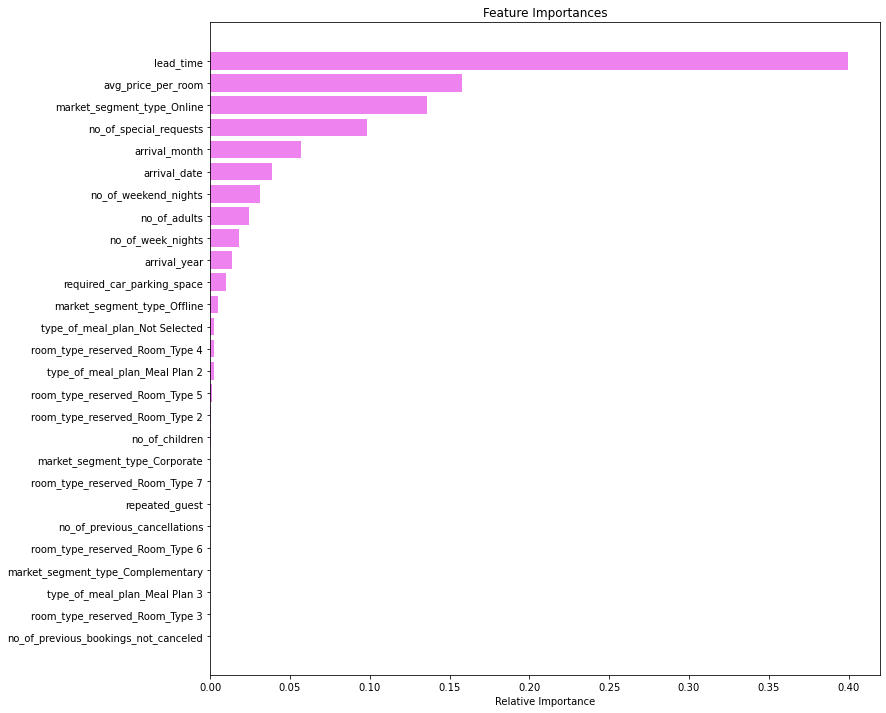

In [395]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* Lead time is the top important feature to predict if a booking would be cancelled or not.

## Model Performance Comparison and Conclusions

In [396]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.986608,0.763123,0.820160], 'Test_Recall':[0.810335,0.766893,0.785633]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.986608,0.810335
1,Decision treee with hyperparameter tuning,0.763123,0.766893
2,Decision tree with post-pruning,0.820160,0.785633


* We analyzed the "INNHotelsGroup" datasest using different techniques and used Decision Tree Classifier to build a predictive model for the same.
* The model built can be used to predict if a booking is going to get canceled or not.
* We visualized different trees and their confusion matrix to get a better understanding of the model. 
* lead_time, avg_price_per_room, market_segment_type_Online and no_of_special_requests are the most important variables in predicting a booking would get canceled. 
* Decision tree model without any pruning has given the best recall score but for better predictability of the model with lesser over-fitting, we will go ahead with the pre-pruned model. Its recall score is only lesser by a bit as compared to the original decision tree.
* According to the pre-pruned decision tree model - 

    a) If a booking was made with a lead time of less than or equals to 151.50 days, there's a very high chance that booking wont be canceled.

    b) If a booking was made with a lead time of more than 151.50 days, the booking would be canceled.

* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

## Comparing Logistic Regression vs Decision Tree

In [397]:
print("Test set performance comparison - Logistic Regression:")
models_test_comp_df

Test set performance comparison - Logistic Regression:


,Logistic Regression-0.50 Threshold,Logistic Regression-0.37 Threshold
Accuracy,0.804649,0.796012
Recall,0.630892,0.739353
Precision,0.729003,0.666667
F1,0.676408,0.701131


In [398]:
print("Test performance comparison - Decision Tree:")
comparison_frame

Test performance comparison - Decision Tree:


,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.986608,0.810335
1,Decision treee with hyperparameter tuning,0.763123,0.766893
2,Decision tree with post-pruning,0.820160,0.785633


#### Observations:
* Comparing test set performance, our decision tree model is giving us a slightly higher recall score than the model built by logistic regression. 
* In both models, the important variables are lead_time, avg_price_per_room, no_of_special_requests and arrival month.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* Since increasing lead times lead to higher rates of cancellation, limit the furthest date in the future that a customer can book to be 4 months from now, such that it is lesser than the 151.50 days as predicted by our pre-pruned decision tree.

* There are some customers who made as high as 11 and 13 prior cancellations who we should take note of to avoid in the future. Customers who have previously cancelled 13 times cancelled their current bookings as well. This group must be closely monitored and any future bookings by them should be declined as they have a high chance of cancelling it once again.

* Customers who have high number of previous bookings not cancelled should be taken note as they are important for brand equity. For example, there is a customer who has booked 58 times previously and hasn't cancelled a single time before. This group of people can be rewarded with special discounts and coupons. 

* As the cancellation rates of repeated guests are lower than that of new guests, we can do more to retain customers. Member Loyalty program initiatives like special discounts, coupons, etc can be provided to attract more repeated guests. 

* Online market segment type is the most popular and it has got the highest cancellation rates. We could charge a small cancellation fee for cancellations made in online bookings so as to discourage cancellations. 

* The top 3 months in terms of cancellations are July (~45%), June (~40%) and August (~39%) respectively which we would have to watch out for. We can charge a small cancellation fee for cancellations made in bookings in these months as well so as to discourage cancellations. 